<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/Clasificaci%C3%B3n_supervisada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. SUPERVISED CLASSIFICATION

- LINEAR DISCRIMINANT ANALYSIS (LDA)
- NAÏVE BAYES
- KNN
- DECISION TREES 
- SUPPORT VECTOR MACHINES (SVM)
- ARTIFICIAL NEURAL NETWOKS (ANNs)

## 3.1 LINEAR DISCRIMINANT ANALYSIS (LDA)

The Bayes theorem in the context of data classification:
\begin{equation*}
p(\omega_i|\vec{x}) = \frac{p(\vec{x}|\omega_i) p(\omega_i)}{p(\vec{x})}
\end{equation*}
where $\vec{x} = \{x_1,\dots,x_d\}$ is an observation in a d-dimensional feature space and $\omega_i$ is a label for class $i$. 
Bayesian decision theory: Assign observation $\vec{x}$ to the class that maximizes the posterior probability $p(\omega_i|\vec{x})$:
\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} p(\omega_i|\vec{x}) 
\end{equation*}

We define the discriminant function $g_i(\vec{x})$ as:
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = \log p(\vec{x}|\omega_i) + \log p(\omega_i)
\end{equation*}

When all $G$ classes have equal prior probabilities $p(\omega_i)=1/G$, the Maximum a Posteriori decision is equivalent to a Maximum Likelihood since 
the posterior is proportional to the likelihood function $p(\omega_i|\vec{x}) \propto p(\vec{x}|\omega_i)$. 

Let's assume that observations $\vec{x}$ belonging to class $\omega_i$ are distributed according to a d-dimensional multivariate normal $N(\mu_i,\Sigma_i)$. The likelihood is then given by:
\begin{equation*}
p(\vec{x}|\omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} 
e{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)}
\end{equation*}
%
and the discriminant function $g_i(\vec{x})$ is then given by:
%
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i)
\end{equation*}

Multi-class supervised classification algorithm based on discriminant functions: 

[1] Construct a {\bf training set} of labeled observations $\mathcal{D}_i$ for each class $\omega_i, \, i=1,\dots,G$:

\begin{eqnarray*}
\mathcal{D}_i = \{\vec{x}_1,\dots,\vec{x}_N \}
\end{eqnarray*}

[2] Use training sets $\mathcal{D}_i, \, i=1,\dots,G$ to estimate the i-the class parameters $(\mu_i,\Sigma_i)$. 

[3] Classify a new unlabeled observation $\vec{x}_{new}$ to the class with maximum discriminant function:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} g_i(\vec{x}_{new}) 
\end{equation*}


**Example: LDA on artificial data:**

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]
[2.]


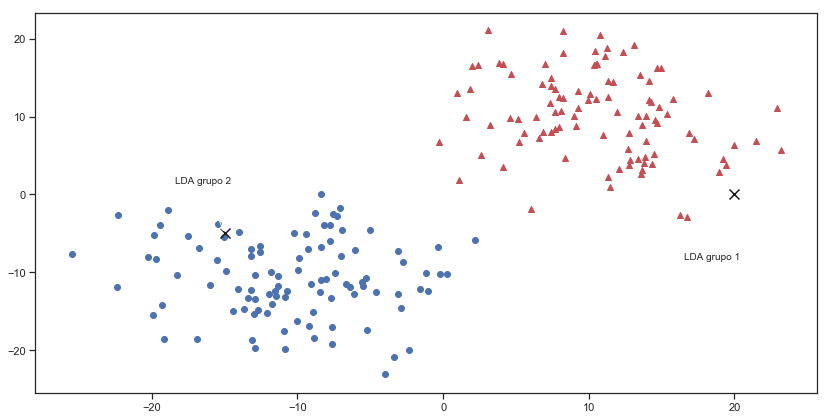

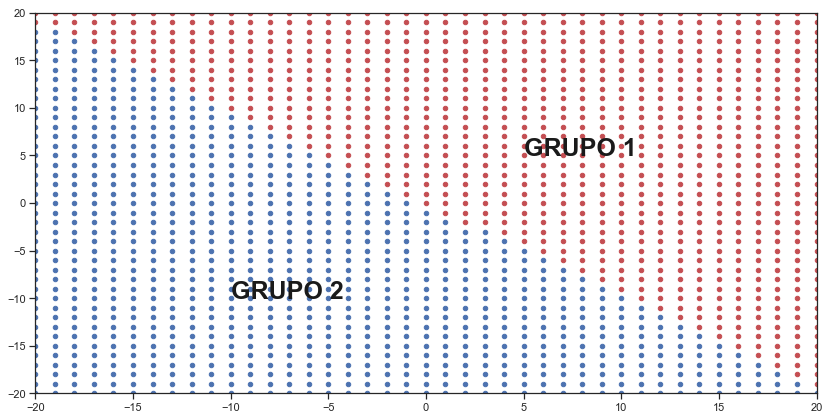

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Datos gaussianos:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Representar gráficamente los datos de entrenamiento: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenar los dos conjuntos de puntos:
XT = np.concatenate((X1,X2))

# Etiquetar los datos como tipo 1 o tipo 2:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Fase de entrenamiento: 
clf = LinearDiscriminantAnalysis(n_components=2,priors=None)
clf.fit(XT, labelT)

#Fase de predicciÛn:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# RepresentaciÛn de la predicciÛn de los datos [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA grupo 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA grupo 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# PredicciÛn de datos en una retÌcula:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'GRUPO 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'GRUPO 2',fontsize=25,fontweight='bold',color='k')
plt.show()

**Example: LDA on UCI wine dataset:**


In [ ]:
import numpy as np
import pylab
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

import csv
Names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
DATA=[]
csv.register_dialect('myDialect', delimiter= ';', skipinitialspace=True)

with open('winequality-white.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, dialect="myDialect")
    for row in spamreader:
        L=[]
        for i in row :
            L.append(float(i))
        DATA.append(L)

#remove first line, ex-name of data
DATA=DATA[1:len(DATA)]

Training=[]
Qual=[]
for row in DATA:
    Training.append(row[0:11])
    Qual.append(row[11])
csvfile.close()


# We cut the data in two sets, one for validation one for training
Validation=Training[len(Training)-100:len(Training)]
Training=Training[:len(Training)-100]

clf = LinearDiscriminantAnalysis(n_components=11,priors=None)
clf.fit(Training, Qual[:len(Training)])

print(clf.predict([[8, 0.3, 0.4, 8, 0.05, 30, 180, 1, 3.3, 0.5, 10]])) 

#let's compute the confusion matrix with the Validation data-set and the Quality corresponding

Prediction=[]
for i  in Validation :
    Prediction.append(float(clf.predict([i])))
print("Confusion matrix :")
print(confusion_matrix(Qual[len(Training):],Prediction))
print("Here are the Cij, number of prediction made in group i but which are supposed to be in group j \nQuality goes from", min (min(Qual[len(Training):]),min(Prediction))," to ",max(max(Qual[len(Training):]),max(Prediction)) )


[5.]
Confusion matrix :
[[ 1  0  2  0  0]
 [ 1 13 10  0  0]
 [ 0 10 39  7  0]
 [ 1  0  9  6  0]
 [ 0  0  1  0  0]]
Here are the Cij, number of prediction made in group i but which are supposed to be in group j 
Quality goes from 4.0  to  8.0


/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


**Exercise: Two-class discriminant analysis with 2D features:**

Consider the training set: 

Class $\omega_1$: $\mathcal{D}_1 =\{(3,4),(2,6),(4,6),(3,8)\}$. 

Class $\omega_2$: $\mathcal{D}_2 =\{(3,0),(1,-2),(5,-2),(3,-4)\}$. 

- Obtain sample estimates of the mean and covariance matrix for each class.

- Obtain the discriminant functions $g_1(\vec{x}),g_2(\vec{x})$ assuming equal priors.

- Evaluate $g_1(\vec{x}),g_2(\vec{x})$ to classify a new observation $\vec{x}_{new} = (2,-1)$.

Result: $g_1(\vec{x}) = -(x_1-3)^2-\frac{1}{4}(x_2-6)^2$, $g_2(\vec{x}) = -\frac{1}{4}(x_1-3)^2-\frac{1}{4}(x_2+2)^2$.
\end{exampleblock}


## 3.2 NAÏVE BAYES

Assume that features $x_i$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{i=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_i \sim N(\mu_i,\sigma_i^2)$, the discriminant function $g_i(\vec{x})$ is: 
%
\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_i-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(y_pred)

from sklearn.metrics import confusion_matrix
y_true = iris.target
confusion_matrix(y_true, y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

## 3.3 K-nearest neighbours (KNN)

Very simple algorithm: An unlabeled observation is classified by assigning the label which is most frequent among the k training samples nearest to that point (i.e. the k-th nearest neighbours).

knn.png![image.png](attachment:image.png)

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
Xnew = np.array([2.5]).reshape(1, -1)
print(knn.predict(Xnew))
Xnew1 = np.array([0.5]).reshape(1, -1)
print(knn.predict(Xnew1))


[1]
[0]


## 3.4 DECISION TREES

- Classification And Regression Tress (CART): Solve both regression and classification problems. 

- Tree creation: We start from a training set of labelled observations. Data is splitted in child nodes by using binary queries. The query at each split is selected accoding to a measure of node impurity: A node is said to be pure if all the observations have the same label. 

- The grow of the binary tree creates a set of linear decision boundaries splitting the data in different groups.



**EXAMPLE: The UCI mushroom dataset**

https://archive.ics.uci.edu/ml/datasets/mushroom

table_mushroom.png![image.png](attachment:image.png)


**Example: Constructing a decision tree:** 
For each feature, we shoud evaluate how well it splits the data in classes in such a way that each value of the feature contains only one of the classes. One of the evaluation measures is to count how many observations are classified according to the majority of classes in each feature value. Fos instance, the feature cap-shape has two features: convex and bell. If we choose convex, most of the observations are poisonous (3 over a total of 5). A value bell classifies the two observations as edible, so the total goodness of the feature will be (3+2)/7 = 0.71. We proceed similarly with the other features and the result is that all are equally good. So we can choose one of them randomly. Image we select the feature cap-color to split the data. Then we will have three groups according to the three possible values of the feature cap-color. For the value cap-color = brown, the tree ends classifying the observation as poisonous. Something similar occurs for the value yellow,  for which the two observations are classified as edible. In the case cap-color = white we should further develop the tree using the remaining features. For this reduced set ob 4 observations, we should evaluate the goodness of each of the features. Selecting the feature cap-shape will have a goodness of (2+2)/4 = 1 since the valuers bell correctly classify all obsdervations as edible and the value convex as poisonous. The feature gill-color can not do it better: The performance is (2+1)/4=0.75. Then we choose cap-shape and proceed to complete the decision tree as in the following figure: 

decision_tree_result.png![image.png](attachment:image.png)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("agaricus-lepiota.data")
data.columns=["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing",
                                                    "gill-size","gill-color","stalk-shape","stalk-root",
                                                    "stalk-surface-above-ring","stalk-surface-below-ring",
                                                    "stalk-color-above-ring","stalk-color-below-ring",
                                                    "veil-type","veil-color","ring-number","ring-type",
                                                    "spore-print-color","population","habitat"]

# numeric coding of variables
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

    
y = data['class'].values
X = data.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.30, random_state=21)
    

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


Represent the resulting tree structure for the test data:

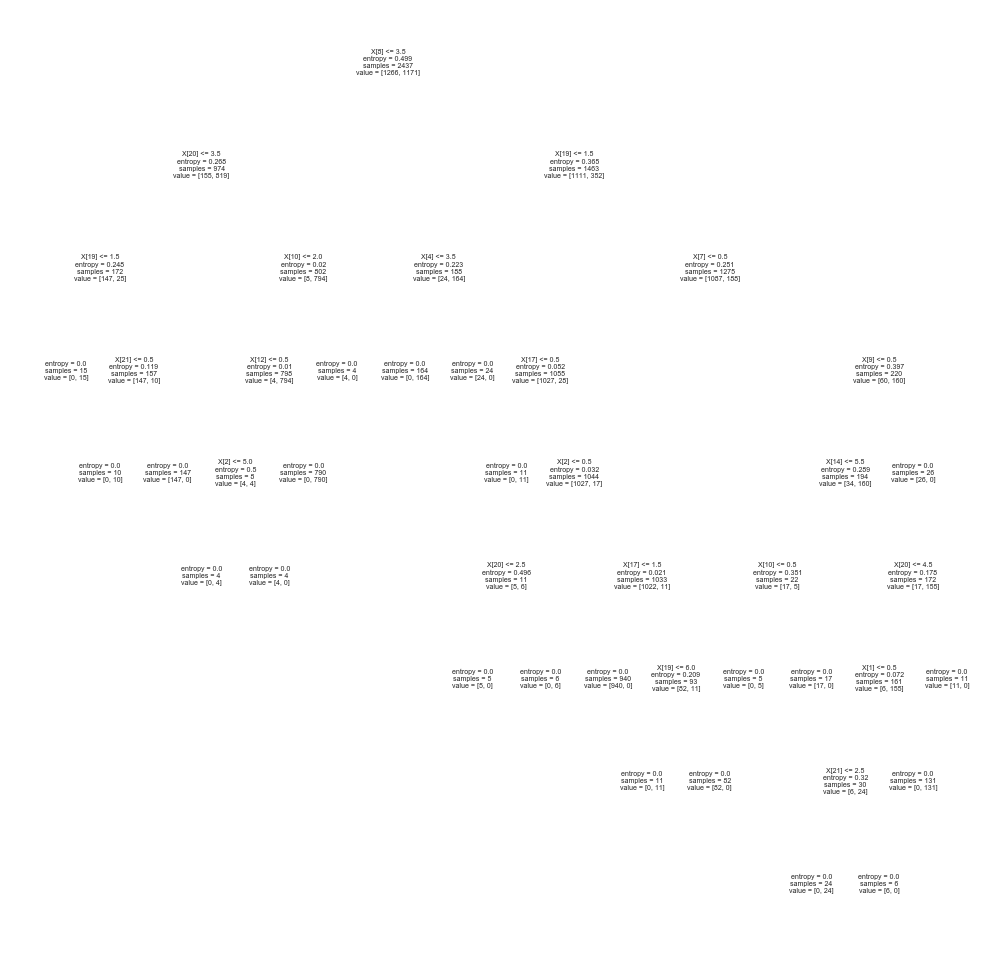

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(X_test,Y_test)) 
plt.show()

** EXERCISE: Represent the decision boundary of the tree in a mutildimensional scatter plot (numerical features):**

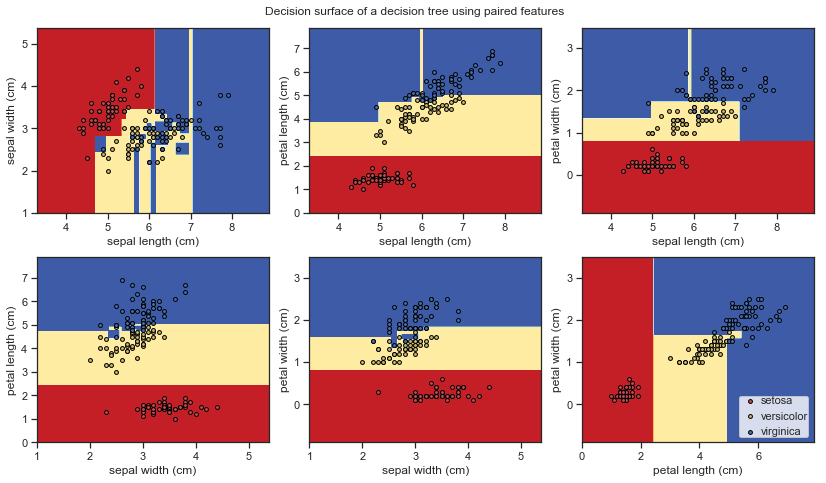

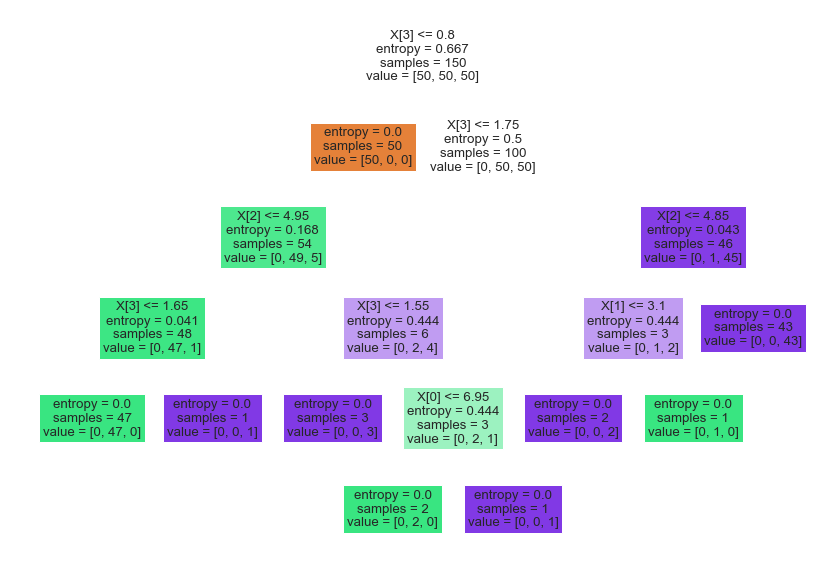

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(12,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(14,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## 3.5 SUPPORT VECTOR MACHINES (SVM's):

kernel trick.png![image.png](attachment:image.png)

Imagine a set of observations that are not linearly separable in the original dimension of the problem. Apply the **Kernel Trick**:

[1] Apply a nonlinear projection (kernel) of the data points into a higher dimensional space to make the problem linearly separable. 

[2] Common nonlinear transformations are: polynomial, Gausssian, Radial Basis Functions. 

[3] Fit a linear discriminant in the augmented space: Use a labelled training set to find the separating hyperplane with largest separation between classes.

[4] The {\em Support vectors} are the training observations that define the optimal separating hyperplane. 

[5] Apply the same projection to predict the class of a new test observation. 


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

X = iris.data
y = iris.target
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1, gamma=1)

results = model.fit(X, y)
scores = model.score(X, y)

#Predict Output
x_test = X[0:1] # predict observation 1 (class 0)
predicted = model.predict(x_test)
print(predicted)

[0]


**TUNNING THE SVM HYPERPARAMETERS:** 

Optimal search algorithm over different models and parameters:

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## 3.6 ARTIFICIAL NEURAL NETWORKS (ANNs)


Given an input vector $\vec{x} = \{x_1,\dots,x_n\}$, the perceptron provides an output: 
\begin{equation*}
y_{out} = f(\sum_{i=1}^n w_i x_i + b)
\end{equation*}
where $f$ is a nonlinear function, $\vec{w}$ are the {\em synaptic weights} and $b$ the bias. 
When the nonlinear function $f(x)$ is binary on $x$, we have {\bf the perceptron}. 
Other usual choices for $f(x)$ are sigmoidal function $f(x)=\frac{2}{1+e^{-2x}}-1$, or radial basis $f(x)=e^{-x^2}$.

Consider a layer of $m$ neurons connected to $n$ inputs with weights $w_{ji}$: 
\begin{equation*}
z_i = g_i(\sum_{j=1}^n w_{ji} x_j + b), i=1,\dots,m
\end{equation*}
And the $p$ outputs of the network are given by:
\begin{equation*}
y_k = g_{out}(\alpha_k + \sum_{i=1}^n w_{ik} z_i), \, k=1,\dots,p
\end{equation*}
Once we choose an artificial neural network architecture, we apply a {\bf learning algorithm} to determine the weights and bias of the network from a set of training data in which input are observations and output are class labels.

ann.jpeg![image.png](attachment:image.png)



### A GUI to understand the relevance of structure and parameters in ANNs:

Tinkering an artificial neural network with TensorFlow


http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,1&seed=0.82329&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## 3.7 PERFORMANCE EVALUATION


- General testing procedure 
- Performance measures
- k-fold cross-validation


In [ ]:
### General testing procedure:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Validation using training data: Wrong! 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_pred = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

Split data in training & test subsets and validate using test: 

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(Xtrain, ytrain)

# evaluate the model on the second set of data
ytest_pred = model.predict(Xtest)
accuracy_score(ytest, ytest_pred)

0.9066666666666666

### Performance measures:

confusion matrix.png![image.png](attachment:image.png)

Classification report:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ytest_pred)

array([[21,  0,  0],
       [ 0, 28,  2],
       [ 0,  5, 19]])

Description of the available performance scores in sklearn libraries:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### k-fold Cross-validation

kfold.gif![image.png](attachment:image.png)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


In [ ]:
from sklearn import metrics
f1_scores = cross_val_score(model,X,y, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


k-fold cross-validation:

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] TEST: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 1

In [ ]:
kf1 = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf1,scoring='accuracy')

array([1.   , 1.   , 0.867, 0.933, 0.833])

Custom performance metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
def tn(y, y_pred): return confusion_matrix(y, y_pred)[0, 0]
def fp(y, y_pred): return confusion_matrix(y, y_pred)[0, 1]
def fn(y, y_pred): return confusion_matrix(y, y_pred)[1, 0]
def tp(y, y_pred): return confusion_matrix(y, y_pred)[1, 1]
tn_score = make_scorer(tn)
fp_score = make_scorer(fp)
fn_score = make_scorer(fn)
tp_score = make_scorer(tp)

In [ ]:
[tn(ytest,ytest_pred)
,fp(ytest,ytest_pred)
,fn(ytest,ytest_pred)
,tp(ytest,ytest_pred)]

[21, 0, 0, 28]

In [ ]:
tp_score(model,X,y)

48

Multiple performance measures

In [ ]:
from sklearn.model_selection import cross_validate
custom_scores = {'tp': tp_score, 'tn': tn_score,'fp': fp_score, 'fn': fn_score}
cv_results = cross_validate(model,X,y,cv=10,scoring=custom_scores,return_train_score=True)

cv_results

{'fit_time': array([0.001, 0.   , 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 'score_time': array([0.01 , 0.006, 0.006, 0.007, 0.011, 0.008, 0.007, 0.006, 0.006,
        0.006]),
 'test_tp': array([5, 5, 5, 5, 3, 5, 4, 5, 5, 5]),
 'train_tp': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'test_tn': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'train_tn': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'test_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

**Exercise: Understanding different performance measures:**

Take a look to the following article discussing how different performance measures capture different 

types of errors in classification problems: 

https://medium.com/datadriveninvestor/accuracy-trap-pay-attention-to-recall-precision-f-score-auc-d02f28d3299c

Use the data in the example in order to create a MATLAB/Python code that computes the confusion matrix and the Reciever-Operating-Characteristic curve (ROC). Upload the codes so that we can share them with your class mates. 

The main objective of this activity is that you get a critical understanding of the different measures and how do they actually capture the relevant errors in your specific problem.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA

# Data vector
# Read .txt document (file has to be in the same folder as this program)
data = pd.read_csv('Data_article.txt', sep=",", header = None)
position = data[:][0]
actualclass = data[:][1]
score = data[:][2]

# Set a threshold to obtain the confusion matrix
# The same results can be obtained using "sklearn" library
string = input("Set your threshold: ")
thresh = float(string)
TP = 0
FP = 0
FN = 0
TN = 0
for i in range(0, np.size(position)):
    # Actual class: POSITIVE
    # Supposed class: POSITIVE
    if ( (score[i] >= thresh) & (actualclass[i] == 1) ):
        confvect = 'TP'
        TP = TP + 1
    # Actual class: NEGATIVE
    # Supposed class: POSITIVE
    elif ( (score[i] >= thresh) & (actualclass[i] == 0) ):
        confvect = 'FP'
        FP = FP + 1
    # Actual class: POSITIVE
    # Supposed class: NEGATIVE
    elif ( (score[i] < thresh) & (actualclass[i] == 1) ):
        confvect = 'FN'
        FN = FN + 1
    # Actual class: NEGATIVE
    # Supposed class: NEGATIVE
    elif ( (score[i] < thresh) & (actualclass[i] == 0) ):
        confvect = 'TN'
        TN = TN + 1

# Model evaluation indicators
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
Fscore = (2*Recall*Precision)/(Recall+Precision)
print([Accuracy, Recall, Precision, Fscore])

Set your threshold: 0.1
[0.15, 1.0, 0.15, 0.2608695652173913]


## Comparing different classification methods over different datasets:

Automatically created module for IPython interactive environment


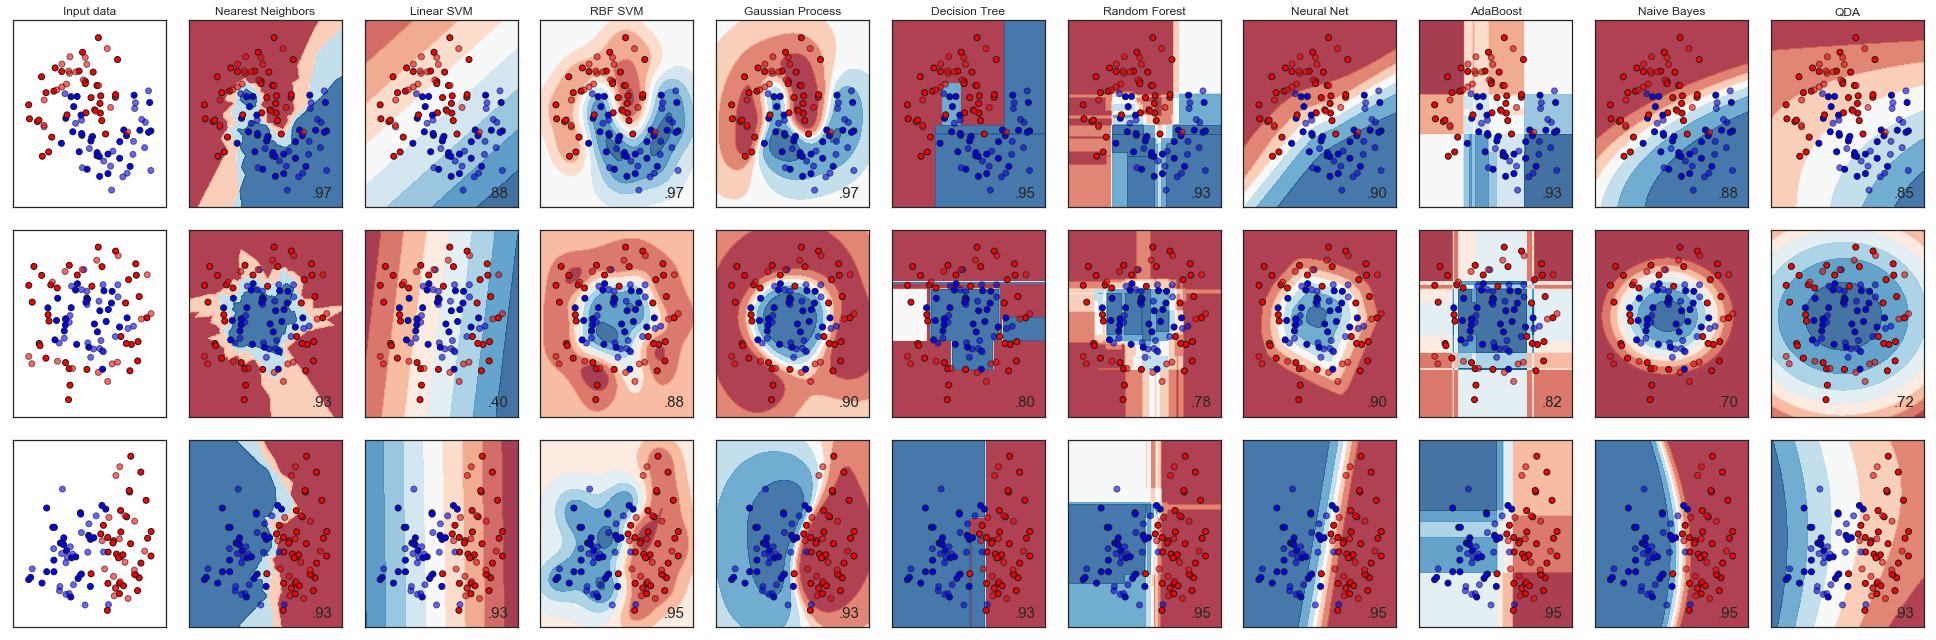

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()